<a href="https://colab.research.google.com/github/subodh2708/deep-learning---tensorflow-2.0/blob/main/03_Introduction_to_CNN_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional neural network and Computer Vision in tensorflow

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-08-14 14:42:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 74.125.200.128, 74.125.130.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.3’

pizza_steak.zip.3   100%[===================>] 104.47M   325MB/s    in 0.3s    

2022-08-14 14:42:11 (325 MB/s) - ‘pizza_steak.zip.3’ saved [109540975/109540975]



## Inspect the data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

for dirpath, dirnames,filenames in os.walk('pizza_steak'):
  print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

there are 2 directories and 0 images in pizza_steak
there are 2 directories and 0 images in pizza_steak/test
there are 0 directories and 250 images in pizza_steak/test/steak
there are 0 directories and 250 images in pizza_steak/test/pizza
there are 2 directories and 0 images in pizza_steak/train
there are 0 directories and 750 images in pizza_steak/train/steak
there are 0 directories and 750 images in pizza_steak/train/pizza


In [6]:
len(os.listdir("pizza_steak/train/steak"))

750

In [7]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir , target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title('target class')
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


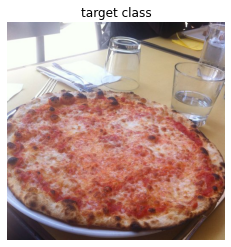

In [9]:
img = view_random_image(target_dir = "pizza_steak/train/", target_class = "pizza")

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[157, 150, 166],
        [153, 149, 164],
        [152, 148, 163],
        ...,
        [ 89,  84, 106],
        [ 90,  82, 105],
        [ 95,  87, 110]],

       [[156, 149, 165],
        [153, 149, 164],
        [153, 149, 164],
        ...,
        [ 90,  85, 108],
        [ 94,  89, 112],
        [104,  99, 122]],

       [[155, 148, 164],
        [153, 149, 164],
        [154, 150, 165],
        ...,
        [ 88,  84, 109],
        [ 94,  90, 115],
        [105, 101, 126]],

       ...,

       [[ 49,  38,  44],
        [ 49,  38,  44],
        [ 48,  37,  43],
        ...,
        [164, 142, 103],
        [165, 143, 102],
        [164, 142, 101]],

       [[ 49,  38,  44],
        [ 48,  37,  43],
        [ 47,  36,  42],
        ...,
        [163, 141, 102],
        [166, 144, 105],
        [167, 145, 104]],

       [[ 48,  37,  43],
        [ 48,  37,  43],
        [ 47,  36,  42],
        ...,
        [162, 140, 10

In [11]:
img/255.

array([[[0.61568627, 0.58823529, 0.65098039],
        [0.6       , 0.58431373, 0.64313725],
        [0.59607843, 0.58039216, 0.63921569],
        ...,
        [0.34901961, 0.32941176, 0.41568627],
        [0.35294118, 0.32156863, 0.41176471],
        [0.37254902, 0.34117647, 0.43137255]],

       [[0.61176471, 0.58431373, 0.64705882],
        [0.6       , 0.58431373, 0.64313725],
        [0.6       , 0.58431373, 0.64313725],
        ...,
        [0.35294118, 0.33333333, 0.42352941],
        [0.36862745, 0.34901961, 0.43921569],
        [0.40784314, 0.38823529, 0.47843137]],

       [[0.60784314, 0.58039216, 0.64313725],
        [0.6       , 0.58431373, 0.64313725],
        [0.60392157, 0.58823529, 0.64705882],
        ...,
        [0.34509804, 0.32941176, 0.42745098],
        [0.36862745, 0.35294118, 0.45098039],
        [0.41176471, 0.39607843, 0.49411765]],

       ...,

       [[0.19215686, 0.14901961, 0.17254902],
        [0.19215686, 0.14901961, 0.17254902],
        [0.18823529, 0

# An end to end example

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory= train_dir,
                                               target_size=(224,224),
                                               batch_size= 32,
                                               class_mode = 'binary',
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = train_dir,
                                              target_size= (224,224),
                                              batch_size = 32,
                                              class_mode = "binary",
                                              seed= 42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding= 'valid'),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss ='binary_crossentropy',
                optimizer='Adam',
                metrics = ['Accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch= len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 489ms/step - loss: 0.8766 - Accuracy: 0.5587 - val_loss: 0.6370 - val_Accuracy: 0.6700
Epoch 2/5
47/47 [==============================] - 14s 295ms/step - loss: 0.6094 - Accuracy: 0.6913 - val_loss: 0.4897 - val_Accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 15s 316ms/step - loss: 0.6689 - Accuracy: 0.7160 - val_loss: 0.5243 - val_Accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 18s 382ms/step - loss: 0.4992 - Accuracy: 0.7913 - val_loss: 0.6221 - val_Accuracy: 0.7967
Epoch 5/5
47/47 [==============================] - 14s 293ms/step - loss: 0.5418 - Accuracy: 0.7720 - val_loss: 0.6162 - val_Accuracy: 0.7313


In [13]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation ='relu'),
    tf.keras.layers.Dense(4,activation ='relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

model_2.compile(loss = 'binary_crossentropy',
                optimizer =tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch= len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data)
            )

Epoch 1/5
47/47 [==============================] - 14s 297ms/step - loss: 1.7682 - accuracy: 0.5073 - val_loss: 0.6922 - val_accuracy: 0.5013
Epoch 2/5
47/47 [==============================] - 13s 271ms/step - loss: 0.6922 - accuracy: 0.5013 - val_loss: 0.6922 - val_accuracy: 0.5013
Epoch 3/5
47/47 [==============================] - 13s 272ms/step - loss: 0.6922 - accuracy: 0.5013 - val_loss: 0.6922 - val_accuracy: 0.5013
Epoch 4/5
47/47 [==============================] - 13s 273ms/step - loss: 0.6922 - accuracy: 0.5013 - val_loss: 0.6922 - val_accuracy: 0.5013
Epoch 5/5
47/47 [==============================] - 13s 277ms/step - loss: 0.6923 - accuracy: 0.5013 - val_loss: 0.6922 - val_accuracy: 0.5013


In [14]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model_3.compile(loss = 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics =['accuracy'])

history_3 = model_3.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch= len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 290ms/step - loss: 3.2104 - accuracy: 0.6500 - val_loss: 1.1162 - val_accuracy: 0.6807
Epoch 2/5
47/47 [==============================] - 13s 285ms/step - loss: 1.1401 - accuracy: 0.6873 - val_loss: 1.4170 - val_accuracy: 0.6613
Epoch 3/5
47/47 [==============================] - 14s 291ms/step - loss: 1.0420 - accuracy: 0.7047 - val_loss: 0.6252 - val_accuracy: 0.7513
Epoch 4/5
47/47 [==============================] - 13s 281ms/step - loss: 1.3111 - accuracy: 0.6880 - val_loss: 0.5348 - val_accuracy: 0.7713
Epoch 5/5
47/47 [==============================] - 13s 278ms/step - loss: 0.5565 - accuracy: 0.7667 - val_loss: 0.8723 - val_accuracy: 0.7187


In [15]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


# Binary Classification : let's break it down

##1. Become one with data

Image shape: (512, 512, 3)
Image shape: (512, 306, 3)


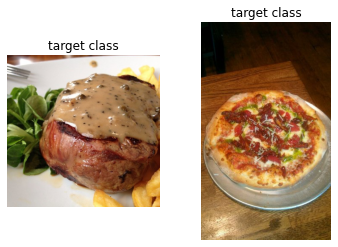

In [16]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

##2. Preprocessing the data(prepare it for model)

In [17]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale = 1/255.)

In [19]:
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = train_dir,
                                             target_size = (224,224),
                                             class_mode ='binary',
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [20]:
images , labels = train_data.next()

In [21]:
len(images) , len(labels)

(32, 32)

In [22]:
len(train_data)

47

In [23]:
images[:2] , images[5].shape

(array([[[[0.3647059 , 0.10980393, 0.02352941],
          [0.37254903, 0.12941177, 0.03921569],
          [0.37647063, 0.14117648, 0.04705883],
          ...,
          [0.7803922 , 0.58431375, 0.3921569 ],
          [0.73333335, 0.54509807, 0.3529412 ],
          [0.75294125, 0.5529412 , 0.3372549 ]],
 
         [[0.3647059 , 0.12156864, 0.03921569],
          [0.37254903, 0.12941177, 0.04705883],
          [0.35686275, 0.11764707, 0.03529412],
          ...,
          [0.7490196 , 0.56078434, 0.37254903],
          [0.7490196 , 0.5529412 , 0.3529412 ],
          [0.7725491 , 0.5568628 , 0.33333334]],
 
         [[0.37254903, 0.1254902 , 0.05490196],
          [0.3647059 , 0.11764707, 0.04705883],
          [0.37254903, 0.13333334, 0.05882353],
          ...,
          [0.7568628 , 0.57254905, 0.3921569 ],
          [0.7372549 , 0.52156866, 0.30980393],
          [0.78823537, 0.5372549 , 0.28627452]],
 
         ...,
 
         [[0.6156863 , 0.5882353 , 0.5254902 ],
          [0.60392

In [24]:
labels

array([1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.],
      dtype=float32)

### Create a CNN model (start with a baseline)

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten,Dense,Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [26]:
model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding ='valid',
           activation ='relu',
           input_shape = (224,224,3)),
    Conv2D(10,3,activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])

model_4.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])



### 4.fit the model

In [27]:
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch= len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 15s 306ms/step - loss: 0.7330 - accuracy: 0.6860 - val_loss: 0.4542 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 14s 295ms/step - loss: 0.4261 - accuracy: 0.8187 - val_loss: 0.3941 - val_accuracy: 0.8253
Epoch 3/5
47/47 [==============================] - 14s 293ms/step - loss: 0.3148 - accuracy: 0.8820 - val_loss: 0.2899 - val_accuracy: 0.8787
Epoch 4/5
47/47 [==============================] - 14s 298ms/step - loss: 0.1747 - accuracy: 0.9473 - val_loss: 0.1379 - val_accuracy: 0.9580
Epoch 5/5
47/47 [==============================] - 14s 300ms/step - loss: 0.1010 - accuracy: 0.9707 - val_loss: 0.0787 - val_accuracy: 0.9793


###evaluate the model

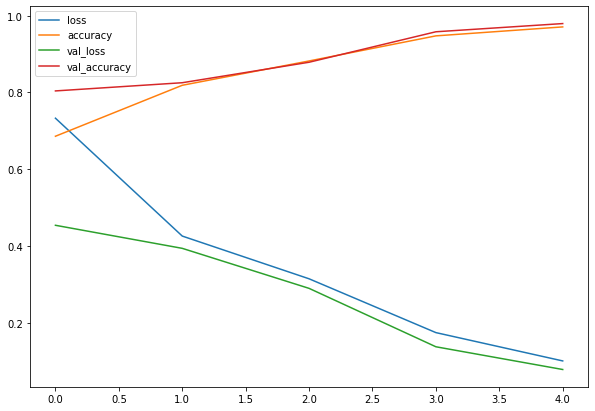

In [28]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [29]:
history_4.history['accuracy']

[0.6859999895095825,
 0.8186666369438171,
 0.8820000290870667,
 0.9473333358764648,
 0.9706666469573975]

In [30]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

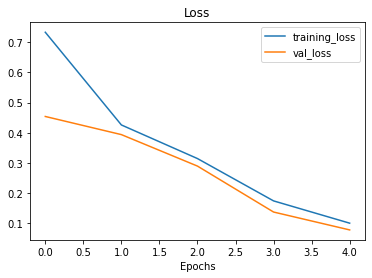

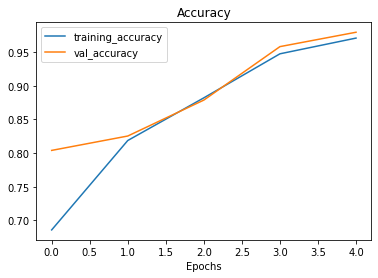

In [31]:
plot_loss_curves(history_4)

In [32]:
model_5 = Sequential([
    Conv2D(10,3,activation = 'relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation ='sigmoid')
])

In [33]:
model_5.compile(loss= 'binary_crossentropy',
                optimizer= Adam(),
                metrics = ['accuracy'])

In [34]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 290ms/step - loss: 0.6428 - accuracy: 0.6420 - val_loss: 0.5258 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 14s 301ms/step - loss: 0.4729 - accuracy: 0.7880 - val_loss: 0.4193 - val_accuracy: 0.8213
Epoch 3/5
47/47 [==============================] - 13s 282ms/step - loss: 0.4299 - accuracy: 0.8120 - val_loss: 0.3953 - val_accuracy: 0.8347
Epoch 4/5
47/47 [==============================] - 13s 283ms/step - loss: 0.3975 - accuracy: 0.8347 - val_loss: 0.3595 - val_accuracy: 0.8573
Epoch 5/5
47/47 [==============================] - 13s 278ms/step - loss: 0.4077 - accuracy: 0.8167 - val_loss: 0.3645 - val_accuracy: 0.8527


In [35]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [36]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


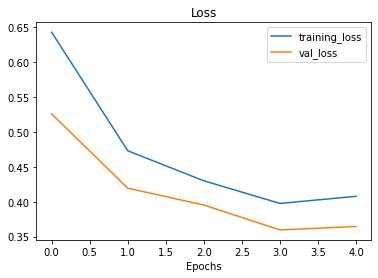

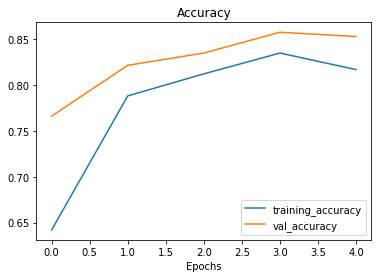

In [37]:
plot_loss_curves(history_5)

### finding Data Augmentation

In [38]:
train_datagen_augmented  = ImageDataGenerator(rescale= 1/255.,
                                               rotation_range= 0.2,
                                               shear_range = 0.2,
                                               zoom_range = 0.2,
                                               width_shift_range= 0.2,
                                               height_shift_range = 0.3,
                                               horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [39]:
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size= (224,224),
                                                                  batch_size = 32,
                                                                  class_mode = 'binary',
                                                                  shuffle = False)
print("Non augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)

print("non augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size  =32,
                                             class_mode  = 'binary')
                                             

Augmented training data
Found 1500 images belonging to 2 classes.
Non augmented training data
Found 1500 images belonging to 2 classes.
non augmented test data
Found 500 images belonging to 2 classes.


In [40]:
images , labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing random number: 24


(-0.5, 223.5, 223.5, -0.5)

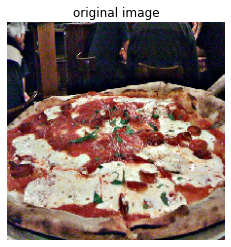

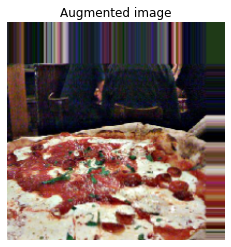

In [41]:
random_number = random.randint(0,32)
print(f'showing random number: {random_number}')
plt.imshow(images[random_number])
plt.title('original image')
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False)

In [42]:
model_6 = Sequential([
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3,activation  = 'relu'),
    MaxPool2D(),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation= 'sigmoid')
])

model_6.compile(loss= 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 490ms/step - loss: 0.6926 - accuracy: 0.5000 - val_loss: 0.6781 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 22s 477ms/step - loss: 0.6963 - accuracy: 0.5327 - val_loss: 0.6744 - val_accuracy: 0.5020
Epoch 3/5
47/47 [==============================] - 22s 478ms/step - loss: 0.6835 - accuracy: 0.5300 - val_loss: 0.6666 - val_accuracy: 0.7240
Epoch 4/5
47/47 [==============================] - 23s 495ms/step - loss: 0.6663 - accuracy: 0.5913 - val_loss: 0.6190 - val_accuracy: 0.6740
Epoch 5/5
47/47 [==============================] - 22s 475ms/step - loss: 0.6457 - accuracy: 0.6473 - val_loss: 0.5935 - val_accuracy: 0.7860


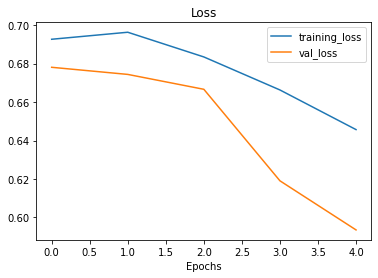

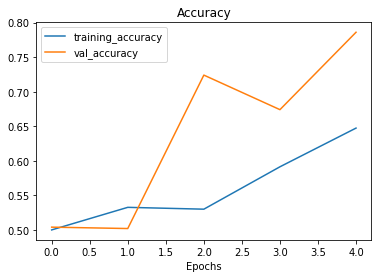

In [43]:
plot_loss_curves(history_6)

In [46]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size = (224,224),
                                                                            batch_size = 32,
                                                                            class_mode = 'binary',
                                                                            shuffle = True)

Found 1500 images belonging to 2 classes.


In [47]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                     
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(), 
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 512ms/step - loss: 0.6866 - accuracy: 0.5373 - val_loss: 0.6276 - val_accuracy: 0.7180
Epoch 2/5
47/47 [==============================] - 22s 477ms/step - loss: 0.5927 - accuracy: 0.6960 - val_loss: 0.4235 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 22s 479ms/step - loss: 0.5238 - accuracy: 0.7407 - val_loss: 0.3695 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 23s 482ms/step - loss: 0.5025 - accuracy: 0.7713 - val_loss: 0.3490 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 23s 482ms/step - loss: 0.4584 - accuracy: 0.7893 - val_loss: 0.3429 - val_accuracy: 0.8480
